<a href="https://colab.research.google.com/github/Gajalakshmisubramani/toxic_comment_detection_deeplearning/blob/main/lillogestic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

string IO exception handling


In [ ]:
import pandas as pd
import csv
from io import StringIO

file_path = '/content/train.csv'

data = []
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    for line_number, line in enumerate(reader):
        try:
            data.append(line)
        except Exception as e:
            print(f"Error in line {line_number}: {e}")

# Create a DataFrame from the collected data
output = StringIO()
writer = csv.writer(output)
writer.writerows(data)
output.seek(0)
df = pd.read_csv(output)
print(df.head())
new_file_path = '/content/clean_train.csv'  # Replace with your desired file path
df.to_csv(new_file_path, index=False)

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...    0.0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...    0.0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...    0.0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...    0.0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate  
0           0.0      0.0     0.0     0.0            0.0  
1           0.0      0.0     0.0     0.0            0.0  
2           0.0      0.0     0.0     0.0            0.0  
3           0.0      0.0     0.0     0.0            0.0  
4           0.0      0.0     0.0     0.0            0.0  


In [ ]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("clean_train.csv")

X = df['comment_text']
y = df['toxic']

df = df.dropna(subset=['toxic'])
X = df['comment_text']
y = df['toxic']

X = X.apply(lambda text: re.sub(r"what's", "what is ", text))
X = X.apply(lambda text: re.sub(r"\'s", " ", text))
X = X.apply(lambda text: re.sub(r"\'ve", " have ", text))
X = X.apply(lambda text: re.sub(r"can't", "cannot ", text))
X = X.apply(lambda text: re.sub(r"n't", " not ", text))
X = X.apply(lambda text: re.sub(r"i'm", "i am ", text))
X = X.apply(lambda text: re.sub(r"i’m", "i am", text))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorized, y_train)

y_pred = logreg_model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report for Toxic:")
print(classification_report(y_test, y_pred))


Accuracy: 0.95

Classification Report for Toxic:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     11259
         1.0       0.86      0.65      0.74      1297

    accuracy                           0.95     12556
   macro avg       0.91      0.82      0.86     12556
weighted avg       0.95      0.95      0.95     12556



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


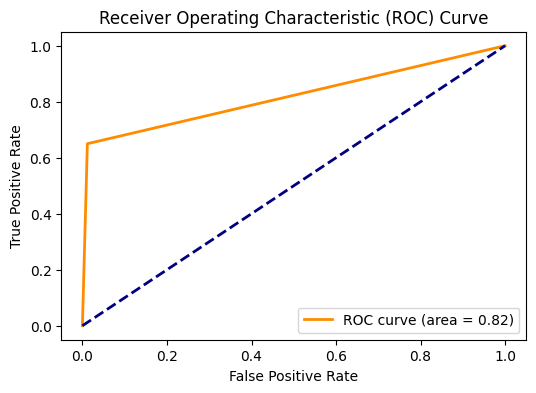

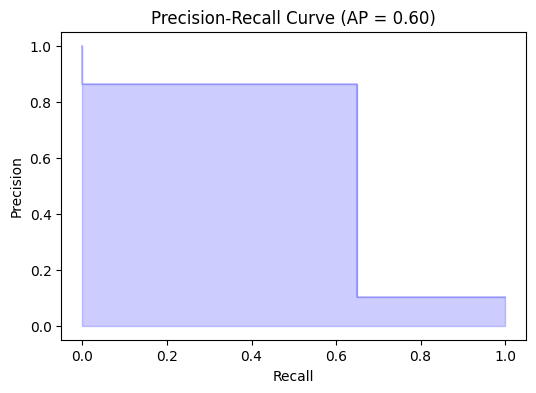

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(6, 4)) plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = {0:.2f})'.format(average_precision))
plt.show()
